# Light

## Working with Electromagnetic Radiation

### Wavelength and Frequency

Each radio station on you receive on your car radio transmits at a different frequency, where the radio tuner selects which frequency is decoded and sent to the speakers.  KEGL (97.1 the Eagle in Dallas) broadcasts over FM (frequency modulation) at 97.1 MHz or $9.71 \times 10^7\ {\rm Hz}$.  We can use the relationship between wavelength and frequency, $c = \lambda f,$ to calculate the wavelength of the FM signal:

$$ \lambda = \frac{c}{f} = \frac{3\times 10^8\ {\rm m/s}}{9.71\times 10^7\ {\rm s^{-1}}} = 3.09\ {\rm m}. $$

AM ([amplitude modulation](https://en.wikipedia.org/wiki/Amplitude_modulation)) wavelengths are longer than FM wavelengths.  

The human ey is most sensitive to light in green and yellow wavelengths, about $500-590\ {\rm nm}$.  If we examne green light with a wavelength of $530\ {\rm nm}$, we can compute its frequency:

$$ f = \frac{c}{\lambda} = \frac{3\times 10^8\ {\rm m/s}}{5.3\times 10^{-7}\ {\rm m}} = 5.66 \times 10^{14}\ {\rm Hz}. $$

That freqeuncy corresponds to 566 *trillion* wave crests passing by each second.  

Below is a python script demonstrating the above calculations.  **Note: this script uses the [scipy.constants](https://docs.scipy.org/doc/scipy/reference/constants.html) library, which is handy for obtaining precise values for fundamental constants (e.g., the speed of light).**

In [2]:
from scipy.constants import c #get the value for the speed of light using the scipy.constants library
KEGL_f = 9.71e7 #FM frequency for 97.1 (KEGL)

lamb = c/KEGL_f
print("The wavelength lambda for KEGL is %1.2f m." % KEGL_f)
print('----------------')

green_lamb = 530*1e-9 #green wavelength at 530 nm (converted to m)

green_freq = c/green_lamb
print("The frequency for a green wavelength at 530 nm is %1.2e Hz." % green_freq)


The wavelength lambda for KEGL is 97100000.00 m.
----------------
The frequency for a green wavelength at 530 nm is 5.66e+14 Hz.


### Photon Energy

How does the energy of a photon relate to its wavelength?  The energy of a photon is directly related to its frequency through the equation $E = hf$.  We can transform this equation to be in terms of the wavelength instead using the relationship between the wavelength, frequency and speed of light.  Then, the equation becomes

\begin{align*}
E = \begin{cases}
hf, \\
\frac{hc}{\lambda}.
\end{cases}
\end{align*}

In both cases the energy also depends on Planck's constant $h$, which is $6.626 \times 10^{-34}\ {\rm J\cdot Hz}$.

Suppose we want to compare the energy between an X-ray photon ($\lambda_X = 1\ {\rm nm}$) and a green photon $(\lambda_{\rm green} = 530\ {\rm nm})$, we can take a ratio so that the constants $hc$ cancle out:

$$ \frac{E_X}{E_{\rm green}} = \frac{hc}{\lambda_X} \times \frac{\lambda_{\rm green}}{hc} = \frac{\lambda_{green}}{\lambda_X} = \frac{530\ {\rm nm}}{1\ {\rm nm}} = 530.$$

The $X$-ray photon has $530\times$ more energy thatn the green photon at $530\ {\rm nm}$.

## Making Use of the Doppler Effect

In many cases, the observed object is moving much less than the speed of light.  We can use the nonrelativistic form of the Doppler equation to determine the radial velocity $v_r$:

\begin{align*} 
v_r &= \left(\frac{\lambda_{\rm obs}-\lambda_{\rm rest}}{\lambda_{\rm rest}}\right) c, \\
&= \left(\frac{\lambda_{\rm obs}}{\lambda_{\rm rest}} - 1\right)c.
\end{align*}

One of the most prominent spectral lines is due to hydrogen's transition from $n=3$ to $n=2$, or the $H\alpha$ line of the Balmer series.  In the lab (rest frame), we measure the rest wavelength as $656.3\ {\rm nm}$.  In the image below, $H\alpha$ is the reddish line on the right.

<p align="center">
<img src="https://upload.wikimedia.org/wikipedia/commons/2/21/Visible_spectrum_of_hydrogen.jpg" 
        alt="hyd-spectrum" 
        width="800" 
        style="display: block; margin: 0 auto" />
</p>

### Starting with a measured wavelength
Suppose that you measure the spectrum of a distant object, where you find the $H\alpha$ line at $659.0\ {\rm nm}$ instead of at the rest wavelength.  What is the radial velocity of the source?

Using the relationship for the radial velocity, we find

$$ v_r = \left(\frac{659.0\ {\rm nm} - 656.3\ {\rm nm}}{656.3\ {\rm nm}}\right) \left(3\times 10^5\ {\rm km/s}\right) = 1200\ {\rm km/s}. $$

The object is moving away (red shift; positive numerator) from you with a radial velocity of $1200\ {\rm km/s}$.  **Note that we used the speed of light converted to $\rm km/s$ instead of in the usual units of $\rm m/s$.**

### Starting with a measured radial velocity
Suppose you read that the radial velocity of our closest stellar neighbor ([Proxima Centauri](https://en.wikipedia.org/wiki/Proxima_Centauri)) is moving toward us with a radial velocity of $-21.6\ {\rm km/s}$.  You want to verify this result using a magnesium source as a reference, which has a bright green line with a rest wavelength of $517.27\ {\rm nm}$.  

<p align="center">
<img src="https://ircamera.as.arizona.edu/Astr2016/images/Frauenhofer.jpg" 
        alt="Mg-spectrum" 
        width="500" 
        style="display: block; margin: 0 auto" />
</p>

What was the observed wavelength in order for the researchers to report a radial velocity of $-21.6\ {\rm km/s}$?

We can solve this problem by re-arranging the Doppler equation to

$$ \lambda_{\rm obs} = \left(1 + \frac{v_r}{c}\right) \lambda_{\rm rest} $$

and substituting to get

$$ \lambda_{\rm obs} = \left(1 + \frac{-21.6\ {\rm km/s}}{3\times 10^5\ {\rm km/s}}\right) \left(517.27\ {\rm nm}\right) = 517.23\ {\rm nm}. $$

The observed wavelength will be shorter than the rest wavelength because it is a blueshift.  The observed Doppler shift will be $\lambda_{\rm obs} - \lambda_{\rm rest} = -0.04\ {\rm nm}$.  This is a small shift, but it is easily measured with modern instruments.

Below are python scripts demonstrating how to perform the calculations.

In [4]:
from scipy.constants import c

Halpha_rest = 656.3 #rest wavelength of H-alpha
Halpha_obs = 659.0 #observed wavelength of H-alpha
c_kms = c/1000 #converted speed of light to km/s

v_r = (Halpha_obs-Halpha_rest)/Halpha_rest*c_kms 
print("The measured radial velocity is %04i km/s." % v_r)
print("---------------")

Mg_rest = 517.27 #rest wavelength of the Mg I line (in nm)
vr_measured = -21.6 #reported radial velocity of Proxima Cen (in km/s)
lamb_obs = (1+vr_measured/c_kms)*Mg_rest
print("The expected observed wavelength for Mg I with the given radial velocity is %3.2f nm." % lamb_obs)

The measured radial velocity is 1233 km/s.
---------------
The expected observed wavelength for Mg I with the given radial velocity is 517.23 nm.


## Working with the Stefan-Bolztmann Law and Wien's Law

### Stefan-Boltzmann Law
The Stefan-Boltzmann law can be used to estimate the luminosity (if you are given radius and temperature) or flux (if you are given just temperature) of objects that behave like a blackbody.  The Sun has an effective surface temperature of $5777\ {\rm K}$ and a [radius](https://en.wikipedia.org/wiki/Solar_radius) of $6.957 \times 10^5\ {\rm km}$.  Using the [Stefan-Boltzmann constant](https://en.wikipedia.org/wiki/Stefan%E2%80%93Boltzmann_law) $(\sigma = 5.67 \times 10^{-8}\ {\rm W\ m^{-2}\ K^{-4}})$, we can determine the solar flux and luminosity at the surface.

The solar flux (how much power per $\rm km^2$) is given by

$$ \mathcal{F}_{\rm Sun} = \sigma T^4 = \left(5.67 \times 10^{-8}\ {\rm W\ m^{-2}\ K^{-4}}\right)\left(5777\ {\rm K}\right)^4 = 6.32 \times 10^7\ {\rm W/m^2}, $$

where the luminosity is simply the surface area $A_{\rm Sun} (= 4\pi R_{\rm sun}^2)$ mutliplied by the flux.  The solar luminosity can be calculated as

\begin{align*}
L_\odot &= \mathcal{F}_{\rm Sun} \times A_{\rm Sun}, \\
&= \left(6.32 \times 10^7\ {\rm W/m^2}\right)\left(4\pi \times [6.957 \times 10^8\ {\rm m}]^2\right), \\
&= 3.84 \times 10^{26}\ {\rm W}.
\end{align*}

How does the Earth compare to the Sun?

Given that the Earth's average temperature is $288\ {\rm K}$, we can calculate the flux ratio as

\begin{align*}
\frac{\mathcal{F}_{\rm Earth}}{\mathcal{F}_{\rm Sun}} &= \left(\frac{\sigma T_{\rm Earth}}{T_{\rm Sun}}\right)^4, \\
&= \left(\frac{288\ {\rm K}}{5777\ {\rm K}}\right)^4 = 6.18 \times 10^{-6}, \\
\mathcal{F}_{\rm Earth} &= 6.18 \times 10^{-6}\ \mathcal{F}_{\rm Sun}.\
\end{align*}

The Earth emits about 6 millionths of the energy per square meter that the Sun does each second.

Using the Earth's radius $(6371\ {\rm km})$, we can also compare the luminosity

\begin{align*}
\frac{L_{\rm Earth}}{L_\odot} &= \left(\frac{R_\oplus}{R_\odot}\right)^2 \left(\frac{\mathcal{F}_{\rm Earth}}{\mathcal{F}_{\rm Sun}}\right), \\
&= \left(\frac{6371\ {\rm km}}{6.957 \times 10^5\ {\rm km}}\right)^2 \left(6.18 \times 10^{-6}\right), \\
&= 5.18 \times 10^{-10}, \\
L_{\rm Earth} &= 5.18 \times 10^{-10}\ {L_\odot}.
\end{align*}

The Earth emits $10^{10}$ times less light than the Sun.  This is important for the search for exoplanets using direct imaging because it shows the contrast-ratio between a Sun-like star and the Earth is ${\sim}10^{-10}$.  This is not yet acheivable with modern instruments, however future missions (e.g., Habitable Worlds Observatory) may be up to the job.

Below are python scripts demonstrating how to perform the calculations.

In [8]:
import numpy as np
from scipy.constants import sigma 

Tsun_eff = 5777 #effective temperature of the Sun's surface (in K)
F_sun = sigma*Tsun_eff**4
R_sun = 6.957e8 #solar radius (in m)

print("The solar flux is %1.2e W/m^2." % F_sun)
print("----------------")

A_sun = 4*np.pi*R_sun**2
L_sun = A_sun*F_sun 
print("The solar luminosity is %1.2e W." % L_sun)
print("---------------")

TEarth = 288 #average temperature of the Earth (in K)
F_ratio = (TEarth/Tsun_eff)**4
print("The Earth-Sun flux ratio is %1.2e." % F_ratio)
print("---------------")

R_Earth = 6371 #Earth radius (in km)
L_ratio = (R_Earth/(R_sun/1000))**2*F_ratio 
print("The Earth-Sun luminosity ratio is %1.2e." % L_ratio)

The solar flux is 6.32e+07 W/m^2.
----------------
The solar luminosity is 3.84e+26 W.
---------------
The Earth-Sun flux ratio is 6.18e-06.
---------------
The Earth-Sun luminosity ratio is 5.18e-10.


### Wien's Law

To determine the temperature of an object, astronomers use the most common wavelength of light emitted by the object.  The most common wavelength corresponds to the wavelength at maximum intensity, or $\lambda_{\rm peak}$.  

<p align="center">
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/a/a2/Wiens_law.svg/1920px-Wiens_law.svg.png" 
        alt="Mg-spectrum" 
        width="500" 
        style="display: block; margin: 0 auto" />
</p>

Wien's law can be written as

$$ T (\text{in K}) = \frac{2.9\times 10^6\ {\rm nm\cdot K}}{\lambda_{\rm peak}}. $$

**Note: the wavelength of light must be converted into $\rm nm$.**

What is the effective surface temperature of the Sun?

The spectrum of the light coming from teh Sun peaks at a wavelength of $\lambda_{\rm peak} \approx 500\ {\rm nm}$, so

$$ T = \frac{2.9\times 10^6\ {\rm nm\cdot K}}{500\ {\rm nm}} = 5800\ {\rm K}.$$

Given that we used round numbers, this value is consistent with the one we used previously (only rounded to the nearest hundred $\rm K$).

What is the peak wavelength at which Earth radiates?

Using an average temperature of $288\ {\rm K}$, we find

$$ {\lambda_{\rm peak}} = \frac{2.9\times 10^6\ {\rm nm\cdot K}}{288\ {\rm}} = 10,100\ {\rm nm} = 10.1\ {\rm \mu m}.$$

Earth's radiation peaks in the infrared region of the spectrum.

Below is a python code that demonstrates the theoretical blackbody curve for the Sun and Earth.  It also marks the peak wavelength with a vertical dashed line.

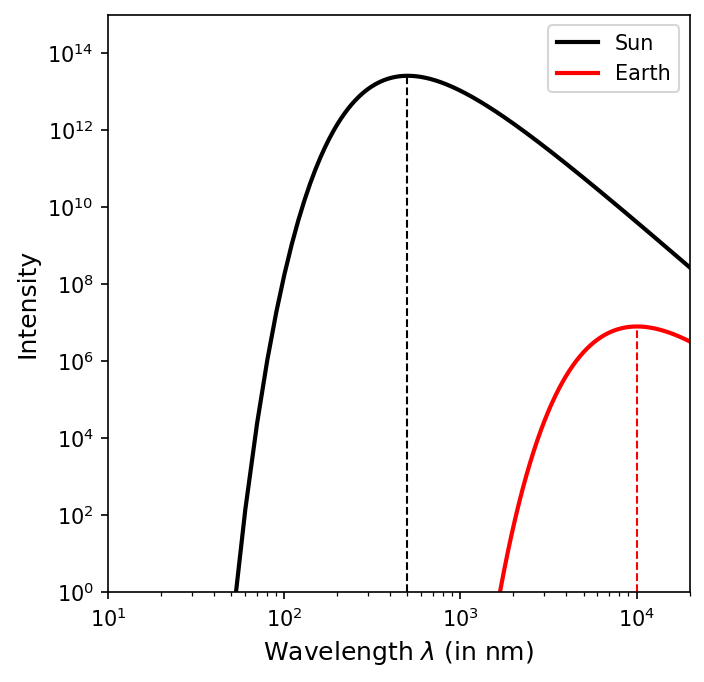

In [46]:
import numpy as np
import matplotlib.pyplot as plt 
from scipy.constants import h,c,k

def planck(lam,T):
    B = (a/lam**5)/(np.exp(b/(lam*T))-1)
    return B

fs = 'large'
a = 2*h*c**2
b = h*c/k
T_Sun = 5777 #effective temperature of the Sun's photosphere (in K)
T_Earth = 288 #average temperature of the Earth (in K)

fig = plt.figure(figsize=(5,5),dpi=150)
ax = fig.add_subplot(111)

l = np.arange(10,50000,10)
I_Sun = planck(l*1e-9,T_Sun)
ax.loglog(l,I_Sun,'k-',lw=2,label="Sun")
ax.vlines(500,1,np.max(I_Sun),color='k',linestyle='--',lw=1)

l = np.arange(100,50000,10)
I_Earth = planck(l*1e-9,T_Earth)
ax.loglog(l,I_Earth,'r-',lw=2,label='Earth')
ax.vlines(1.01e4,1,np.max(I_Earth),color='r',linestyle='--',lw=1)

ax.set_ylim(1,1e15)
ax.set_xlim(10,20000)
ax.legend(loc='best')

ax.set_xlabel("Wavelength $\lambda$ (in nm)", fontsize=fs)
ax.set_ylabel("Brightness ($\\rm W/m^2/Hz/sr$)",fontsize=fs);
